## RNN (LSTM):

- 입력된 데이터의 순서를 고려
- 앞서 받은 데이터를 잠시 기억할 수 있다 -> 중요도에 따라 가중치를 적용하여 다음 데이터로 넘어간다.

- 1. 다수 입력 단일 출력 : 문장을 읽고 뜻을 파악할 때
- 2. 단입 입력 다수 출력 : 사진의 캡션을 만들 때
- 3. 다수 입력 다수 출력 : 문장을 번역할 때

## Classify Reuters with LSTM

In [1]:
from keras.datasets import reuters
import numpy as np

Using TensorFlow backend.


In [2]:
# words with frequency rank of 1-1000
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [3]:
X_train.shape

(8982,)

In [4]:
X_test.shape

(2246,)

In [5]:
category = np.max(Y_train)+1
category

46

In [6]:
# count vector 3 = 3rd most frequent word
print(X_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


### Preprocessing

- 각 기사의 단어 수가 다름으로 단어의 숫자를 맞춰야 한다

In [7]:
from keras.preprocessing import sequence

In [8]:
MAX_LEN = 100
x_train = sequence.pad_sequences(X_train, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(X_test, maxlen=MAX_LEN)

In [9]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

### Model

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

model = Sequential()
# embedding (총 단어 수, 기사당 단어 수)
model.add(Embedding(1000, 100))
# lstm(기사당 단어 수)
model.add(LSTM(100, activation='tanh'))
model.add(Dense(category, activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train,
                   batch_size=100, epochs=20,\
                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 37s 4ms/step - loss: 2.6113 - acc: 0.3473 - val_loss: 2.4102 - val_acc: 0.3620
Epoch 2/20
8982/8982 [==============================] - 36s 4ms/step - loss: 2.1295 - acc: 0.4674 - val_loss: 1.9987 - val_acc: 0.5076
Epoch 3/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.8640 - acc: 0.5240 - val_loss: 1.7954 - val_acc: 0.5387
Epoch 4/20
8982/8982 [==============================] - 40s 4ms/step - loss: 1.7074 - acc: 0.5626 - val_loss: 1.6962 - val_acc: 0.5494
Epoch 5/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.6036 - acc: 0.5939 - val_loss: 1.6483 - val_acc: 0.5926
Epoch 6/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.5173 - acc: 0.6071 - val_loss: 1.5977 - val_acc: 0.5922
Epoch 7/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.4395 - acc: 0.6304 - val_loss: 1.5429 - val_acc: 0.6091
Epoch 8

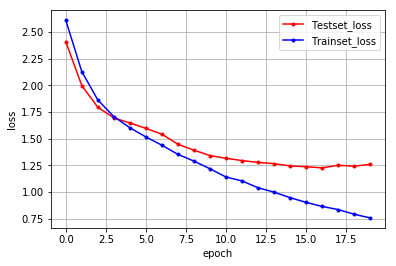

In [26]:
import matplotlib.pyplot as plt

y_vloss = history.history['val_loss']

# training set
y_loss = history.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

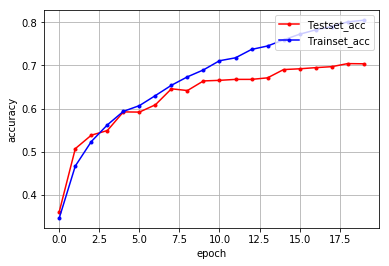

In [14]:
import matplotlib.pyplot as plt

y_vacc = history.history['val_acc']

# training set
y_acc = history.history['acc']

plt.plot(np.arange(len(y_acc)), y_vacc, marker='.', c='red', label='Testset_acc')
plt.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue', label='Trainset_acc')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

### GloVe

In [18]:
import gensim.downloader as api

#https://github.com/RaRe-Technologies/gensim-data
word_vectors = api.load("glove-wiki-gigaword-100")

In [19]:
vocab_size = 1000
embed_size = 100

In [20]:
embedding_weights = np.zeros((vocab_size, embed_size))
for ind in range(vocab_size):
    try:
        embedding_weights[ind, :] = word_vectors.wv[word_vectors.wv.index2word[ind]]
    except KeyError:
        pass

/home/grace/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [21]:
model_tl = Sequential()
# embedding (총 단어 수, 기사당 단어 수)
model_tl.add(Embedding(vocab_size, embed_size, input_length=MAX_LEN, weights=[embedding_weights], trainable=True))
# lstm(기사당 단어 수)
model_tl.add(LSTM(100, activation='tanh'))
model_tl.add(Dense(category, activation='softmax'))

In [22]:
model_tl.compile(loss='categorical_crossentropy',\
             optimizer='adam',\
             metrics=['accuracy'])

In [23]:
history_tl = model_tl.fit(x_train, y_train,
                   batch_size=100, epochs=20,\
                   validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 39s 4ms/step - loss: 2.3850 - acc: 0.3910 - val_loss: 2.1027 - val_acc: 0.4880
Epoch 2/20
8982/8982 [==============================] - 37s 4ms/step - loss: 2.0522 - acc: 0.4912 - val_loss: 1.9744 - val_acc: 0.5138
Epoch 3/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.9135 - acc: 0.5267 - val_loss: 1.8548 - val_acc: 0.5534
Epoch 4/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.7432 - acc: 0.5620 - val_loss: 1.6565 - val_acc: 0.5855
Epoch 5/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.5876 - acc: 0.6000 - val_loss: 1.5872 - val_acc: 0.6028
Epoch 6/20
8982/8982 [==============================] - 37s 4ms/step - loss: 1.4404 - acc: 0.6388 - val_loss: 1.4719 - val_acc: 0.6354
Epoch 7/20
8982/8982 [==============================] - 36s 4ms/step - loss: 1.3243 - acc: 0.6738 - val_loss: 1.3761 - val_acc: 0.6612
Epoch 8

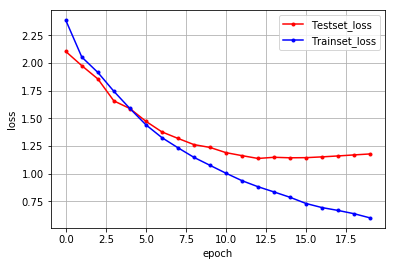

In [24]:
import matplotlib.pyplot as plt

y_vloss = history_tl.history['val_loss']

# training set
y_loss = history_tl.history['loss']

plt.plot(np.arange(len(y_loss)), y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(np.arange(len(y_loss)), y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

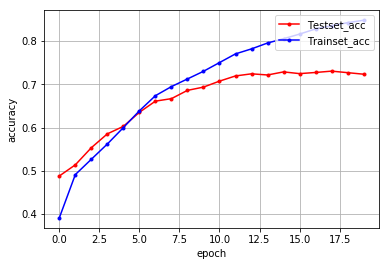

In [25]:
import matplotlib.pyplot as plt

y_vacc = history_tl.history['val_acc']

# training set
y_acc = history_tl.history['acc']

plt.plot(np.arange(len(y_acc)), y_vacc, marker='.', c='red', label='Testset_acc')
plt.plot(np.arange(len(y_acc)), y_acc, marker='.', c='blue', label='Trainset_acc')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()